In [1]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

In [2]:
url = "https://kin.naver.com/search/list.nhn?query=%EB%B9%BC%EB%B9%BC%EB%A1%9C+%EB%8D%B0%EC%9D%B4&page=1"
html = urlopen(url)

soup = BeautifulSoup(html.read(), "html.parser")

In [3]:
docs = soup.find("ul", {"class": "basic1"}).find_all("li")

for doc in docs:
    ans = doc.find_all("dd")[1]
    print(ans)

<dd>... 근데 <b>빼빼로 데이</b>에 어떻게 해야 할까요?? 그냥 빼빼로... 여자친구분에게 <b>빼빼로 데이</b>에 어떻게 해야 할지 고민... 그래서 <b>빼빼로 데이</b>에 단순하게 빼빼로 하나만 주고... </dd>
<dd>천천히 선물을 찾는중인데<b>빼빼로데이</b> 스티커 브랜드... <b>빼빼로데이</b> 스티커로 핫한 제품들 알아봤습니다.... 1 린블리샵 [2시이전-당일출고]<b>빼빼로데이</b>스티커... </dd>
<dd>혹시 지금 <b>빼빼로데이</b> 선물 어린이집 구해야할거 같아서 그러는데 질문! 이쪽... 분들만 답변요청드려요  현재 쿠팡에서 <b>빼빼로데이</b> 이벤트 진행하고 있습니다 쿠팡 이용해보셔요!</dd>
<dd><b>빼빼로 데이</b>에서 '빼빼로'가 어떤 이유로 이렇게 불렀나요?... 지금은 그나마 발렌타인, 화이트데이, <b>빼빼로데이</b>... 11월 11일은 <b>빼빼로 데이</b>로 좋아하는 사람들에게 선물하세요... </dd>
<dd>지인들에게 필요한 생일선물을줘야해서 <b>빼빼로데이</b> 선물 박스 제품에 대해서 아는 분... 26살도 좋아할 상품이면 좋겠습니다 감사합니다~  <b>빼빼로데이</b> 선물 박스 추천드려요... </dd>
<dd>20살 모쏠인데 여자에 관심이없었는데 좋아하는사람이 생겼어요 <b>빼빼로데이</b>에 어떤 선물을 줘야될지 모르겠어요 도와주세요.. 좋아한지는 1년되갑니다 연락은 뛰엄뛰엄... </dd>
<dd><b>빼빼로 데이</b> 유래 1983년 빼빼로가 출시 되었구요. 1994년 부산의 한 여자고등학교에서 삐빼로 이름으로 하나의 말장난이 유래가 되었다고 합니다. 빼빼 마른 몸매를... </dd>
<dd>... 친구한테 오늘 <b>빼빼로데이</b>라 어저께 사고 빼빼로에 간단한 말 써놓고 빼빼로2개 포장하고 쪽지넣고 초콜렛 줬는데..친구가 좋아하겠죠? 최대한 열심히 준비 했는데... </dd>
<dd>내일 이면 사귄지 50일 인데요 <b>빼빼로 데이</b> 랑 겹

In [4]:
tmp_list = []

for doc in docs:
    ans = doc.find_all("dd")[1]
    tmp_list.append(ans.text.strip())

print(tmp_list[:3])

['... 근데 빼빼로 데이에 어떻게 해야 할까요?? 그냥 빼빼로... 여자친구분에게 빼빼로 데이에 어떻게 해야 할지 고민... 그래서 빼빼로 데이에 단순하게 빼빼로 하나만 주고...', '천천히 선물을 찾는중인데빼빼로데이 스티커 브랜드... 빼빼로데이 스티커로 핫한 제품들 알아봤습니다.... 1 린블리샵 [2시이전-당일출고]빼빼로데이스티커...', '혹시 지금 빼빼로데이 선물 어린이집 구해야할거 같아서 그러는데 질문! 이쪽... 분들만 답변요청드려요  현재 쿠팡에서 빼빼로데이 이벤트 진행하고 있습니다 쿠팡 이용해보셔요!']


In [5]:
# 여러 페이지 정보 가져오기
from tqdm.notebook import tqdm

tmp_list = [] 

for i in tqdm(range(1, 10)):    # 수업에는 1000개 
    try:
        url = "https://kin.naver.com/search/list.nhn?query=%EB%B9%BC%EB%B9%BC%EB%A1%9C+%EB%8D%B0%EC%9D%B4&page="+str(i)
        html = urlopen(url)

        soup = BeautifulSoup(html.read(), "html.parser")

        docs = soup.find("ul", {"class": "basic1"}).find_all("li")


        for doc in docs:
            ans = doc.find_all("dd")[1]
            tmp_list.append(ans.text.strip())

        time.sleep(0.5)
    except:
        continue
    
print(len(tmp_list))


90


In [6]:
from konlpy.tag import Okt
okt = Okt()

In [7]:
ko_doc = '\n'.join(tmp_list)
print(ko_doc[:1000])

... 근데 빼빼로 데이에 어떻게 해야 할까요?? 그냥 빼빼로... 여자친구분에게 빼빼로 데이에 어떻게 해야 할지 고민... 그래서 빼빼로 데이에 단순하게 빼빼로 하나만 주고...
천천히 선물을 찾는중인데빼빼로데이 스티커 브랜드... 빼빼로데이 스티커로 핫한 제품들 알아봤습니다.... 1 린블리샵 [2시이전-당일출고]빼빼로데이스티커...
혹시 지금 빼빼로데이 선물 어린이집 구해야할거 같아서 그러는데 질문! 이쪽... 분들만 답변요청드려요  현재 쿠팡에서 빼빼로데이 이벤트 진행하고 있습니다 쿠팡 이용해보셔요!
빼빼로 데이에서 '빼빼로'가 어떤 이유로 이렇게 불렀나요?... 지금은 그나마 발렌타인, 화이트데이, 빼빼로데이... 11월 11일은 빼빼로 데이로 좋아하는 사람들에게 선물하세요...
지인들에게 필요한 생일선물을줘야해서 빼빼로데이 선물 박스 제품에 대해서 아는 분... 26살도 좋아할 상품이면 좋겠습니다 감사합니다~  빼빼로데이 선물 박스 추천드려요...
20살 모쏠인데 여자에 관심이없었는데 좋아하는사람이 생겼어요 빼빼로데이에 어떤 선물을 줘야될지 모르겠어요 도와주세요.. 좋아한지는 1년되갑니다 연락은 뛰엄뛰엄...
빼빼로 데이 유래 1983년 빼빼로가 출시 되었구요. 1994년 부산의 한 여자고등학교에서 삐빼로 이름으로 하나의 말장난이 유래가 되었다고 합니다. 빼빼 마른 몸매를...
... 친구한테 오늘 빼빼로데이라 어저께 사고 빼빼로에 간단한 말 써놓고 빼빼로2개 포장하고 쪽지넣고 초콜렛 줬는데..친구가 좋아하겠죠? 최대한 열심히 준비 했는데...
내일 이면 사귄지 50일 인데요 빼빼로 데이 랑 겹쳐요 50일은 가볍게 해도 될거 같은데 주로 100일 단위로 챙기니까 빼빼로 만 주면 될까요 ? 어떻게 해야 되나요 ? 좀 멀리...
지금 빼빼로데이 선물 사야될거 같은데 질문합니다 이쪽 이평면 주변에 살 수... 빠른 답변 부탁 빼빼로데이 선물 어린이집 선물 상품중에서 이 소리니...
안녕하세요.제가 다가오는 빼빼로 데이 때 선물을 할려고 합니다.빼빼로 데이

In [8]:
print(len(ko_doc))

8354


In [9]:
import time

start = time.time()
ko_doc_noun = okt.nouns(ko_doc)
print(time.time()-start)

6.120625734329224


In [10]:
from collections import Counter

count_noun = Counter(ko_doc_noun)

In [11]:
count_noun.most_common(20)

[('빼빼로데이', 144),
 ('빼빼로', 102),
 ('선물', 78),
 ('데이', 50),
 ('어린이집', 19),
 ('때', 19),
 ('친구', 18),
 ('제품', 15),
 ('남친', 14),
 ('요', 12),
 ('제', 12),
 ('곧', 12),
 ('상품', 11),
 ('날', 11),
 ('초콜릿', 11),
 ('인기', 11),
 ('하나', 8),
 ('핫', 8),
 ('내일', 8),
 ('것', 8)]

In [12]:
stopword_list = ['빼빼로데이', '빼빼로', '데이']

for word in count_noun:
    if len(word) == 1:
        stopword_list.append(word)
        
stopword_list[-5:]

['스', '질', '명', '흠', '못']

In [13]:
# stopword 단어를 모두 pop()

for stopword in stopword_list:
    if stopword in count_noun:
        count_noun.pop(stopword)

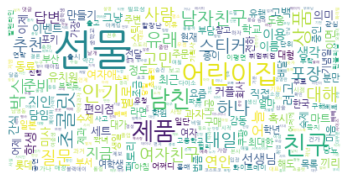

In [14]:
from wordcloud import WordCloud

wc_noun = WordCloud(background_color='white', max_words=2000, 
                     font_path=r'C:\Windows\Fonts\NanumGothic.ttf')
wc_noun = wc_noun.generate_from_frequencies(count_noun)

import matplotlib.pyplot as plt
plt.imshow(wc_noun, interpolation="bilinear")
plt.axis("off")
plt.show()

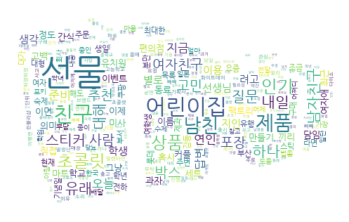

In [15]:
import numpy as np
from PIL import Image

img_mask = np.array(Image.open('present.jpg'))

wc_img = WordCloud(background_color='white', max_words=2000, font_path=r'C:\Windows\Fonts\NanumGothic.ttf',
                  mask=img_mask)

wc_img = wc_img.generate_from_frequencies(count_noun)

import matplotlib.pyplot as plt
plt.imshow(wc_img, interpolation="bilinear")
plt.axis("off")
plt.show()